<a href="https://colab.research.google.com/github/claredavies/DataEngAPITesting/blob/master/AnamolyDetection/HTTP_Response/Semi-Supervised/Monitor_Latency_StatusCode_Semisupervised_LOF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read in Data

In [21]:
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
from numpy import where

In [22]:
data = pd.read_csv("Traffic_train.csv")
print(data.head())

   Delay  Code
0  15000   302
1      0   302
2      0   302
3  11000   302
4  19000   302


In [23]:
print(data['Code'].unique())

[302 200 404 400 201 500 204]


In [24]:
data['Code'].value_counts()

200    5918
201     952
400     662
404     314
204     172
500      36
302      35
Name: Code, dtype: int64

In [25]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['Code'])
print(one_hot_encoded_data)

      Delay  Code_200  Code_201  Code_204  Code_302  Code_400  Code_404  \
0     15000         0         0         0         1         0         0   
1         0         0         0         0         1         0         0   
2         0         0         0         0         1         0         0   
3     11000         0         0         0         1         0         0   
4     19000         0         0         0         1         0         0   
...     ...       ...       ...       ...       ...       ...       ...   
8084  13000         1         0         0         0         0         0   
8085  14000         1         0         0         0         0         0   
8086  21000         1         0         0         0         0         0   
8087  15000         1         0         0         0         0         0   
8088  17000         1         0         0         0         0         0   

      Code_500  
0            0  
1            0  
2            0  
3            0  
4            0

In [26]:
df = one_hot_encoded_data[["Delay", "Code_200", "Code_201", "Code_204", "Code_302", "Code_400", "Code_404", "Code_500"]]

# Train

In [48]:
model = LocalOutlierFactor(n_neighbors=20, novelty=True, contamination=0.1)
model.fit(df)

LocalOutlierFactor(contamination=0.1, n_neighbors=5, novelty=True)

In [49]:
data2 = pd.read_csv("test.csv")
one_hot_encoded_data2 = pd.get_dummies(data2, columns = ['Code'])
df2 = one_hot_encoded_data2[["Delay", "Code_200", "Code_201", "Code_204", "Code_302", "Code_400", "Code_404", "Code_500","Y"]]

In [50]:
df2

,Delay,Code_200,Code_201,Code_204,Code_302,Code_400,Code_404,Code_500,Y
0,16000,1,0,0,0,0,0,0,1
1,15000,1,0,0,0,0,0,0,1
2,16000,1,0,0,0,0,0,0,1
3,14000,1,0,0,0,0,0,0,1
4,15000,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
6353,16000,0,0,0,0,1,0,0,1
6354,16000,1,0,0,0,0,0,0,1
6355,15000,1,0,0,0,0,0,0,1
6356,16000,1,0,0,0,0,0,0,1


In [51]:
X_test=df2[["Delay", "Code_200", "Code_201", "Code_204", "Code_302", "Code_400", "Code_404", "Code_500"]]
y_test=df2[["Y"]]

In [52]:

y_pred = model.predict(X_test)
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  "X does not have valid feature names, but"


array([1, 1, 1, ..., 1, 1, 1])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


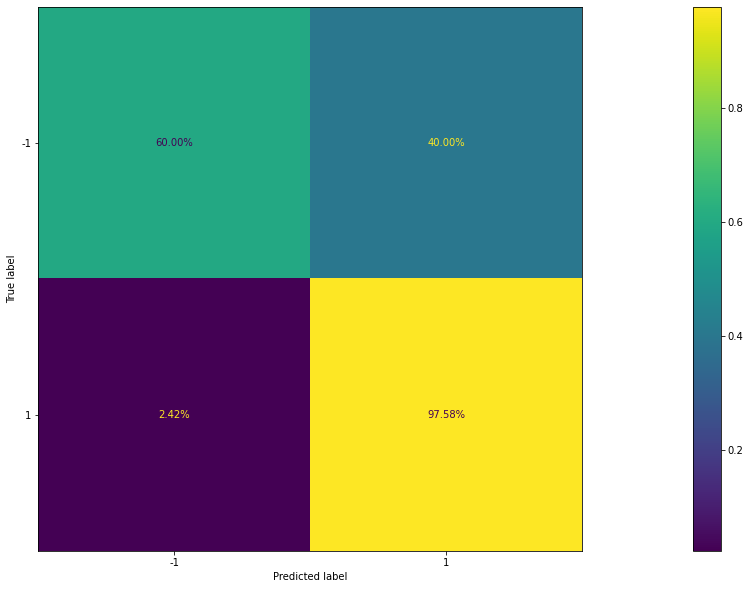

In [53]:

from sklearn.metrics import plot_confusion_matrix
IC = type('IdentityClassifier', (), {"predict": lambda i : i, "_estimator_type": "classifier"})
plot_confusion_matrix(IC, y_pred, y_test, normalize='true', values_format='.2%');

# Evaluation

In [14]:
novel_index = where(y_pred == -1) 
novel_values = df2.iloc[novel_index]
novel_values

,Delay,Code_200,Code_201,Code_204,Code_302,Code_400,Code_404,Code_500,Y
6,7000,1,0,0,0,0,0,0,1
19,16000,0,0,0,0,0,1,0,1
38,31000,0,1,0,0,0,0,0,1
46,15000,0,0,1,0,0,0,0,1
112,16000,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...
6268,15000,0,0,1,0,0,0,0,1
6274,15000,0,0,0,1,0,0,0,1
6288,7000,1,0,0,0,0,0,0,1
6323,15000,0,0,0,0,0,1,0,1


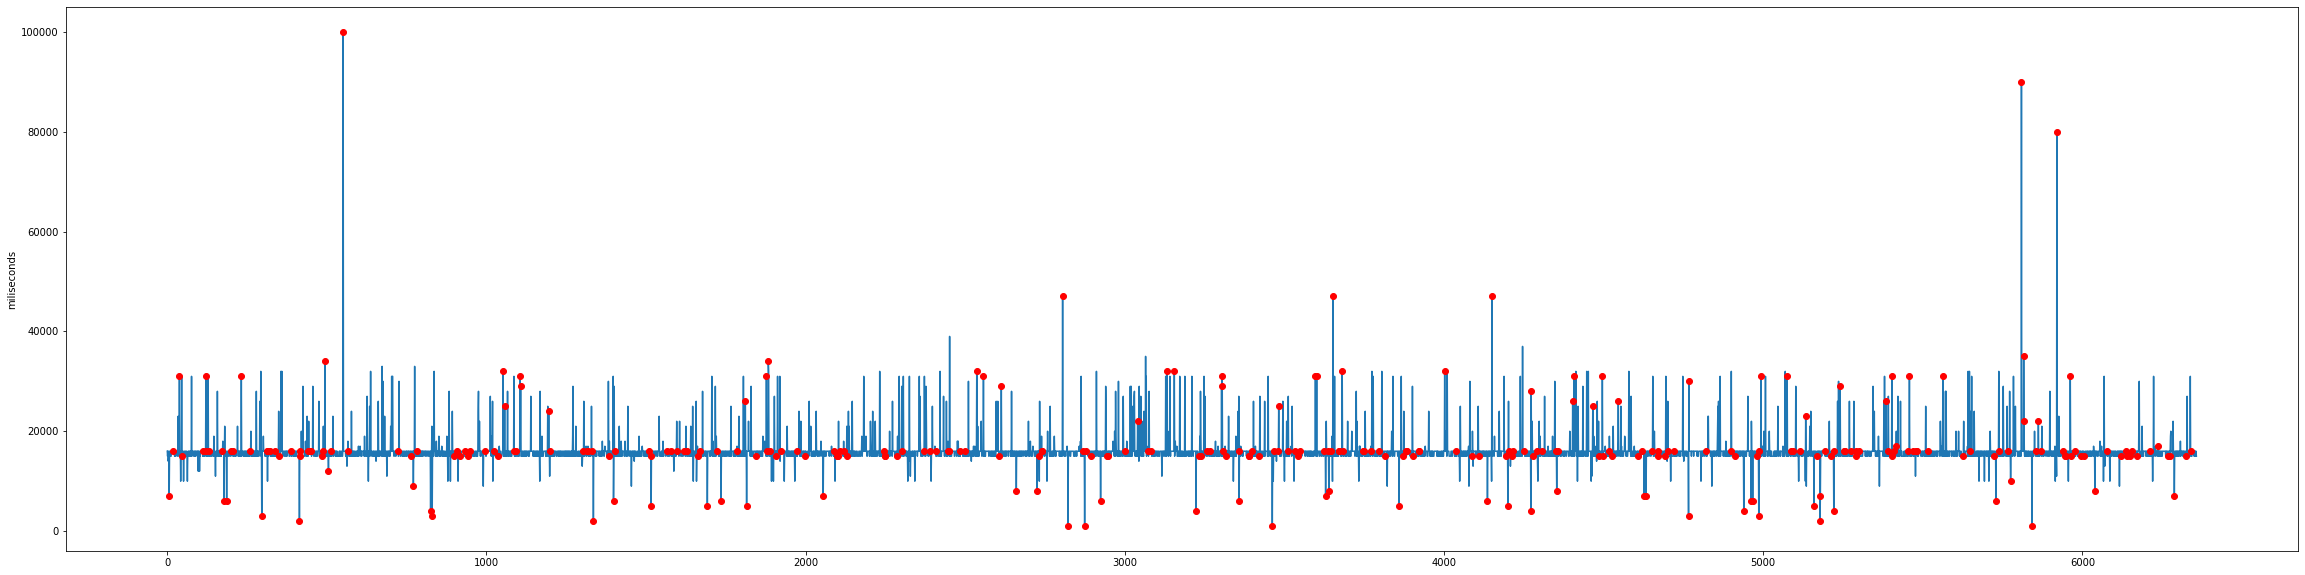

In [15]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (40,10)
plt.plot(df2['Delay'])
plt.plot(df2.iloc[novel_index]['Delay'],"ro")
plt.ylabel('miliseconds')
plt.show()